In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [16]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

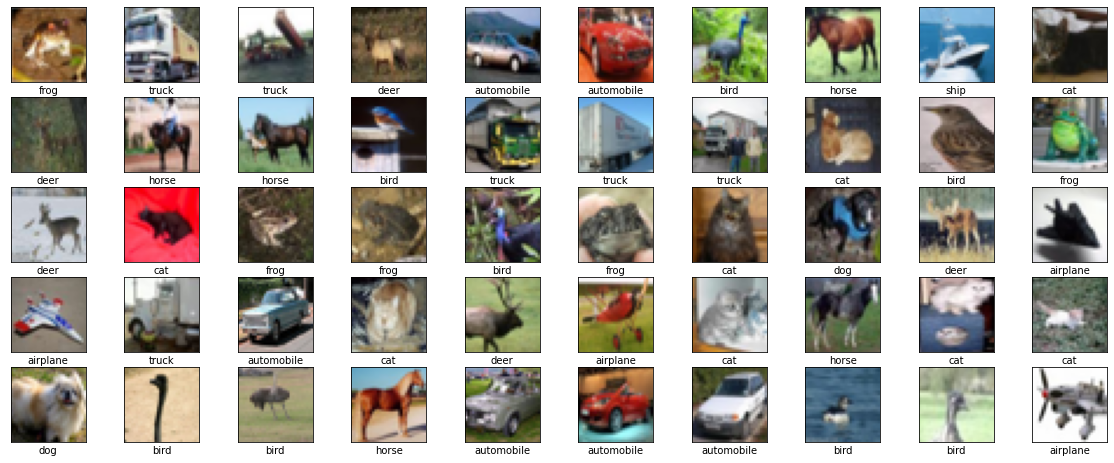

In [5]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [19]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

In [17]:
model.compile(
    optimizer='adam', 
    loss='kullback_leibler_divergence', 
    metrics=['accuracy']
)

In [18]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 60s 48ms/step - loss: 20.8303 - accuracy: 0.1292 - val_loss: 20.6913 - val_accuracy: 0.1032
Epoch 2/5
1250/1250 [==============================] - 59s 47ms/step - loss: 20.7314 - accuracy: 0.0982 - val_loss: 20.6911 - val_accuracy: 0.0956
Epoch 3/5
1250/1250 [==============================] - 59s 47ms/step - loss: 20.7314 - accuracy: 0.0981 - val_loss: 20.6910 - val_accuracy: 0.0999
Epoch 4/5
1250/1250 [==============================] - 59s 47ms/step - loss: 20.7313 - accuracy: 0.0996 - val_loss: 20.6910 - val_accuracy: 0.1057
Epoch 5/5
1250/1250 [==============================] - 59s 47ms/step - loss: 20.7313 - accuracy: 0.1032 - val_loss: 20.6910 - val_accuracy: 0.0995


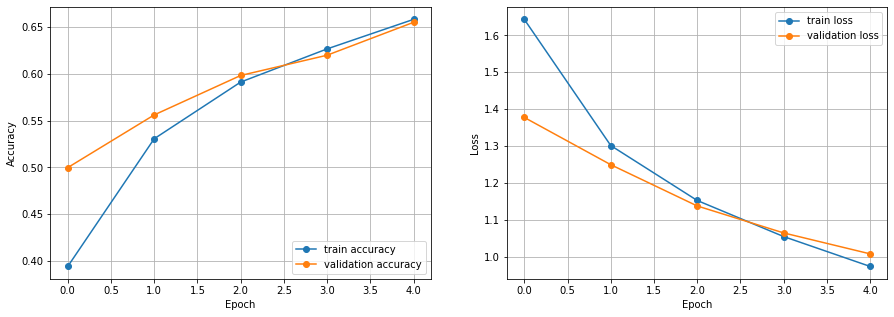

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 14ms/step - loss: 1.0133 - accuracy: 0.6452

Test Accuracy: 0.6452000141143799

Test Loss: 1.0132639408111572


In [12]:
predictions = model.predict(X_test)

In [13]:
predictions[0]

array([1.6905539e-02, 1.5030280e-04, 8.2759941e-03, 5.3577757e-01,
       2.9971632e-03, 4.0053493e-01, 8.5726529e-03, 2.2338023e-03,
       2.4386987e-02, 1.6503769e-04], dtype=float32)

In [14]:
np.argmax(predictions[0])

3

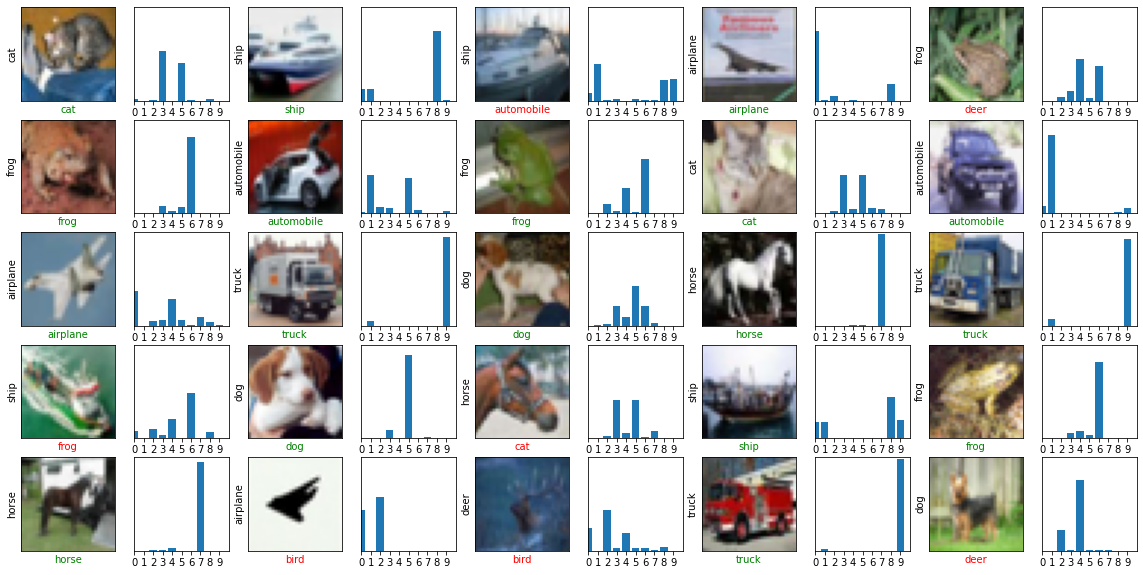

In [15]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()